## Gathering Data
Import some packages and create Twitter API object:

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import csv
import json
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
consumer_key = 'bnjlJVrx8xsBlzQdmHAW4dNtl'
consumer_secret = 'T4AyIXOfHrrIexDaE4kHnHZColbNJdrIhTbMKAkiV4BKXoUHBa'
access_token = '79327122-hvQrvFwlWxAWG0ikwiLsix6WLjEDaHdEjqxy0qtfK'
access_secret = 'cohfOLkvwNtJkybxfYhfH5WGFurIrChKm7BG5SV1sgEPb'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

Gather data from `twitter-archive-enhanced.csv`, the first set of data given with data from WeRateDogs:

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Gathering data of dogs' images:

In [5]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [6]:
with open('image_predictions.tsv', 'w') as file:
    file.write(r.text)

In [7]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Interacting with Twitter API and gathering data from previous tweets (missing data will be jumped), which takes about 10 minutes:

In [10]:
'''t0 = time.time()
tweets = ""
errors = []
with open('tweet_json.txt', 'w') as file:
    count = 0;
    count_fails = 0;
    for id in list(twitter_archive['tweet_id']):
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            tweets += '{}\n'.format(json.dumps(tweet._json))
            count += 1
            if count%250 == 0:
                print('tweets proccessed correctly: {}'.format(count))
        except tweepy.TweepError:
            tweets.join('None\n')
            count_fails += 1
    file.write(tweets)
d = time.time() - t0
print("duration: {:.2f} s.\nfailed requests: {}".format(d, count_fails))
'''

't0 = time.time()\ntweets = ""\nerrors = []\nwith open(\'tweet_json.txt\', \'w\') as file:\n    count = 0;\n    count_fails = 0;\n    for id in list(twitter_archive[\'tweet_id\']):\n        try:\n            tweet = api.get_status(id, tweet_mode=\'extended\')\n            tweets += \'{}\n\'.format(json.dumps(tweet._json))\n            count += 1\n            if count%250 == 0:\n                print(\'tweets proccessed correctly: {}\'.format(count))\n        except tweepy.TweepError:\n            tweets.join(\'None\n\')\n            count_fails += 1\n    file.write(tweets)\nd = time.time() - t0\nprint("duration: {:.2f} s.\nfailed requests: {}".format(d, count_fails))\n'

Now, let's read our `.txt` with more info about the tweets:

In [11]:
with open('tweet_json.txt') as file:
    additional_info_tweets = pd.read_json(file, lines = True)

Let's check basic info of our new dataframe and info about users

In [12]:
additional_info_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1325 non-null datetime64[ns]
display_text_range               1325 non-null object
entities                         1325 non-null object
extended_entities                1160 non-null object
favorite_count                   1325 non-null int64
favorited                        1325 non-null bool
full_text                        1325 non-null object
geo                              0 non-null float64
id                               1325 non-null int64
id_str                           1325 non-null int64
in_reply_to_screen_name          39 non-null object
in_reply_to_status_id            39 non-null float64
in_reply_to_status_id_str        39 non-null float64
in_reply_to_user_id              39 non-null float64
in_reply_to_user_id_str          39 n

In [13]:
additional_info_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32753,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6179,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24667,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4089,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41529,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8503,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39720,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9209,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19939,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3065,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Let's check if all tweets are originals by checking the presence of `retweeted_status` (answer will be False if any retweet appears):  

In [14]:
additional_info_tweets["retweeted_status"].isnull().any()

True

Vimos acima que a busca na API do twitter apenas teve sucesso para 1325 valores de `tweet_id`(a maioria dos outros posts deve ter sido apagada, mas podem ter ocorrido outros erros na requisição feita), enquanto obtivemos 2075 tweets com informações de imagens, armazenadas no dataframe `images_predictions`. Para concluir a coleta de dados, vamos unir os dataframes segundo a identificação dos tweets, ou seja, os `tweet_id`:

In [15]:
twitter_archive_master_aux = pd.merge(twitter_archive, image_predictions, on = 'tweet_id', how='outer')

In [16]:
twitter_archive_master_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [17]:
additional_info_tweets.rename(columns = {"id": "tweet_id"}, inplace = True)
twitter_archive_master = pd.merge(twitter_archive_master_aux, additional_info_tweets, on='tweet_id', how='outer')

In [18]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 59 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            23

# Analyze


Before analyzing quality and tidiness of our data, let's first identify which key variables we are going to use in our analysis, to drop others from our dataframes. Remember, our master table was constructed from three different table, so any change here will not affect these 3 sources. This kind of one quality problem.

### `twitter_archive_master`: 
Relevant variables: tweet_id, created_at, full_text, rating_numerator, name, doggo, floofer, pupper, puppo,jpg_url, img_num, p1, p2, p3, favorite_count, retweet_count

ps: rating_denominator is always ten so let's drop this column

In [19]:
columns_to_keep = ['tweet_id', 'created_at','timestamp', 'rating_numerator', 'full_text', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo','jpg_url','img_num', 'p1', 'p2', 'p3', 'favorite_count', 'retweet_count']
twitter_archive_master = twitter_archive_master[columns_to_keep]

In [20]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id            2356 non-null int64
created_at          1325 non-null datetime64[ns]
timestamp           2356 non-null object
rating_numerator    2356 non-null int64
full_text           1325 non-null object
text                2356 non-null object
name                2356 non-null object
doggo               2356 non-null object
floofer             2356 non-null object
pupper              2356 non-null object
puppo               2356 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null float64
p1                  2075 non-null object
p2                  2075 non-null object
p3                  2075 non-null object
favorite_count      1325 non-null float64
retweet_count       1325 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(12)
memory usage: 349.7+ KB


In [21]:
twitter_archive_master.head()

,tweet_id,created_at,timestamp,rating_numerator,full_text,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count
0,892420643555336193,NaT,2017-08-01 16:23:56 +0000,13,NaN,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,bagel,banana,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,2017-08-01 00:17:27 +0000,13,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,32753.0,6179.0
2,891815181378084864,2017-07-31 00:18:03,2017-07-31 00:18:03 +0000,12,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,24667.0,4089.0
3,891689557279858688,2017-07-30 15:58:51,2017-07-30 15:58:51 +0000,13,This is Darla. She commenced a snooze mid meal...,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,41529.0,8503.0
4,891327558926688256,2017-07-29 16:00:24,2017-07-29 16:00:24 +0000,12,This is Franklin. He would like you to stop ca...,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,39720.0,9209.0


In [22]:
twitter_archive_master.groupby(['doggo', 'floofer', 'pupper', 'puppo']).agg('count')

tweet_id  created_at  timestamp  rating_numerator  \
doggo floofer pupper puppo                                                      
None  None    None   None       1976        1147       1976              1976   
                     puppo        29          23         29                29   
              pupper None        245          81        245               245   
      floofer None   None          9           3          9                 9   
doggo None    None   None         83          60         83                83   
                     puppo         1           1          1                 1   
              pupper None         12           9         12                12   
      floofer None   None          1           1          1                 1   

                            full_text  text  name  jpg_url  img_num    p1  \
doggo floofer pupper puppo                                                  
None  None    None   None        1147  1976  1976     1754     1754  1754   
                     puppo         23    29    29       23       23    23   
              pupper None          81   245   245      211      211   211   
      floofer None   None           3     9     9        7        7     7   
doggo None    None   None          60    83    83       67       67    67   
                     puppo          1     1     1        1        1     1   
              pupper None           9    12    12       11       11    11   
      floofer None   None           1     1     1        1        1     1   

                              p2    p3  favorite_count  retweet_count  
doggo floofer pupper puppo                                             
None  None    None   None   1754  1754            1147           1147  
                     puppo    23    23              23             23  
              pupper None    211   211              81             81  
      floofer None   None      7     7               3              3  
doggo None    None   None     67    67              60             60  
                     puppo     1     1               1              1  
              pupper None     11    11               9              9  
      floofer None   None      1     1               1              1

In [23]:
twitter_archive_master.groupby('name').agg('count')

,tweet_id,created_at,timestamp,rating_numerator,full_text,text,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count
name,,,,,,,,,,,,,,,,,
Abby,2,0,2,2,0,2,2,2,2,2,2,2,2,2,2,0,0
Ace,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
Acro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Adele,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
Aiden,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aja,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Akumi,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Al,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Albert,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
twitter_archive_master[twitter_archive_master.name.str.len() == 1]

,tweet_id,created_at,timestamp,rating_numerator,full_text,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count
56,881536004380872706,2017-07-02 15:32:16,2017-07-02 15:32:16 +0000,14,Here is a pupper approaching maximum borkdrive...,Here is a pupper approaching maximum borkdrive...,a,None,None,pupper,None,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1.0,Samoyed,Angora,Persian_cat,48770.0,15719.0
649,792913359805018113,2016-10-31 02:17:31,2016-10-31 02:17:31 +0000,13,Here is a perfect example of someone who has t...,Here is a perfect example of someone who has t...,a,None,None,None,None,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4.0,web_site,lighter,switch,15439.0,4439.0
775,776201521193218049,2016-09-14 23:30:38,2016-09-14 23:30:38 +0000,10,This is O'Malley. That is how he sleeps. Doesn...,This is O'Malley. That is how he sleeps. Doesn...,O,None,None,None,None,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1.0,Rottweiler,black-and-tan_coonhound,bloodhound,10267.0,2763.0
801,772581559778025472,2016-09-04 23:46:12,2016-09-04 23:46:12 +0000,10,Guys this is getting so out of hand. We only r...,Guys this is getting so out of hand. We only r...,a,None,None,None,None,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3.0,Newfoundland,Border_collie,Saint_Bernard,6915.0,1845.0
1002,747885874273214464,NaT,2016-06-28 20:14:22 +0000,8,NaN,This is a mighty rare blue-tailed hammer sherk...,a,None,None,None,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1.0,kuvasz,Samoyed,pug,NaN,NaN
1004,747816857231626240,NaT,2016-06-28 15:40:07 +0000,4,NaN,Viewer discretion is advised. This is a terrib...,a,None,None,None,None,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1.0,Pembroke,Chihuahua,Shetland_sheepdog,NaN,NaN
1017,746872823977771008,NaT,2016-06-26 01:08:52 +0000,11,NaN,This is a carrot. We only rate dogs. Please on...,a,None,None,None,None,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1.0,Pembroke,beagle,Italian_greyhound,NaN,NaN
1049,743222593470234624,NaT,2016-06-15 23:24:09 +0000,12,NaN,This is a very rare Great Alaskan Bush Pupper....,a,None,None,pupper,None,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1.0,kuvasz,soft-coated_wheaten_terrier,golden_retriever,NaN,NaN
1193,717537687239008257,NaT,2016-04-06 02:21:30 +0000,11,NaN,People please. This is a Deadly Mediterranean ...,a,None,None,None,None,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1.0,golden_retriever,Labrador_retriever,kuvasz,NaN,NaN
1207,715733265223708672,NaT,2016-04-01 02:51:22 +0000,10,NaN,This is a taco. We only rate dogs. Please only...,a,None,None,None,None,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1.0,Dandie_Dinmont,miniature_poodle,toy_poodle,NaN,NaN


In [25]:
twitter_archive_master[twitter_archive_master.name.str.len() == 2]

,tweet_id,created_at,timestamp,rating_numerator,full_text,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count
393,825876512159186944,2017-01-30 01:21:19,2017-01-30 01:21:19 +0000,11,This is Mo. No one will push him around in the...,This is Mo. No one will push him around in the...,Mo,None,None,None,None,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1.0,shopping_cart,shopping_basket,mousetrap,11127.0,2039.0
446,819015337530290176,2017-01-11 02:57:27,2017-01-11 02:57:27 +0000,14,RT @dog_rates: This is Bo. He was a very good ...,RT @dog_rates: This is Bo. He was a very good ...,Bo,doggo,None,None,None,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,standard_poodle,toy_poodle,Tibetan_terrier,0.0,40230.0
449,819004803107983360,2017-01-11 02:15:36,2017-01-11 02:15:36 +0000,14,This is Bo. He was a very good First Doggo. 14...,This is Bo. He was a very good First Doggo. 14...,Bo,doggo,None,None,None,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,standard_poodle,toy_poodle,Tibetan_terrier,92304.0,40230.0
553,804026241225523202,2016-11-30 18:16:08,2016-11-30 18:16:08 +0000,13,This is Bo. He's going to make me cry. 13/10 p...,This is Bo. He's going to make me cry. 13/10 p...,Bo,None,None,None,None,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1.0,web_site,envelope,guillotine,47983.0,17902.0
583,800188575492947969,2016-11-20 04:06:37,2016-11-20 04:06:37 +0000,11,RT @dog_rates: This is Bo. He's a Benedoop Cum...,RT @dog_rates: This is Bo. He's a Benedoop Cum...,Bo,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,0.0,4352.0
679,789137962068021249,2016-10-20 16:15:26,2016-10-20 16:15:26 +0000,12,This is Bo. He's a West Congolese Bugaboop Snu...,This is Bo. He's a West Congolese Bugaboop Snu...,Bo,None,None,None,None,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2.0,Chihuahua,Pekinese,Pembroke,10442.0,3081.0
686,788070120937619456,2016-10-17 17:32:13,2016-10-17 17:32:13 +0000,11,RT @dog_rates: This is Bo and Ty. Bo eats pape...,RT @dog_rates: This is Bo and Ty. Bo eats pape...,Bo,None,None,None,None,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1.0,golden_retriever,Sussex_spaniel,Labrador_retriever,0.0,3773.0
759,778396591732486144,2016-09-21 00:53:04,2016-09-21 00:53:04 +0000,10,RT @dog_rates: This is an East African Chalupa...,RT @dog_rates: This is an East African Chalupa...,an,None,None,None,None,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1.0,hippopotamus,doormat,sea_lion,0.0,13431.0
820,770414278348247044,2016-08-30 00:14:12,2016-08-30 00:14:12 +0000,11,Meet Al Cabone. He's a gangsta puppa. Rather h...,Meet Al Cabone. He's a gangsta puppa. Rather h...,Al,None,None,None,None,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1.0,maillot,maillot,golden_retriever,6716.0,2250.0
852,765395769549590528,2016-08-16 03:52:26,2016-08-16 03:52:26 +0000,13,This is my dog. Her name is Zoey. She knows I'...,This is my dog. Her name is Zoey. She knows I'...,my,None,None,None,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1.0,Pembroke,Cardigan,Shetland_sheepdog,28125.0,3693.0


In [26]:
twitter_archive_master[twitter_archive_master.name == 'None']

,tweet_id,created_at,timestamp,rating_numerator,full_text,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count
5,891087950875897856,2017-07-29 00:08:17,2017-07-29 00:08:17 +0000,13,Here we have a majestic great white breaching ...,Here we have a majestic great white breaching ...,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,19939.0,3065.0
7,890729181411237888,2017-07-28 00:22:40,2017-07-28 00:22:40 +0000,13,When you watch your owner call another dog a g...,When you watch your owner call another dog a g...,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,Eskimo_dog,Pembroke,64464.0,18571.0
12,889665388333682689,2017-07-25 01:55:32,2017-07-25 01:55:32 +0000,13,Here's a puppo that seems to be on the fence a...,Here's a puppo that seems to be on the fence a...,None,None,None,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,Pembroke,Cardigan,basenji,47427.0,9897.0
24,887343217045368832,2017-07-18 16:08:03,2017-07-18 16:08:03 +0000,13,You may not have known you needed to see this ...,You may not have known you needed to see this ...,None,None,None,None,None,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1.0,Mexican_hairless,sea_lion,Weimaraner,33197.0,10243.0
25,887101392804085760,2017-07-18 00:07:08,2017-07-18 00:07:08 +0000,12,This... is a Jubilant Antarctic House Bear. We...,This... is a Jubilant Antarctic House Bear. We...,None,None,None,None,None,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1.0,Samoyed,Eskimo_dog,Staffordshire_bullterrier,30131.0,5873.0
30,886267009285017600,2017-07-15 16:51:35,2017-07-15 16:51:35 +0000,12,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,116.0,4.0
32,886054160059072513,2017-07-15 02:45:48,2017-07-15 02:45:48 +0000,12,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,0.0,105.0
35,885518971528720385,2017-07-13 15:19:09,2017-07-13 15:19:09 +0000,14,I have a new hero and his name is Howard. 14/1...,I have a new hero and his name is Howard. 14/1...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,20131.0,3705.0
37,885167619883638784,2017-07-12 16:03:00,2017-07-12 16:03:00 +0000,13,Here we have a corgi undercover as a malamute....,Here we have a corgi undercover as a malamute....,None,None,None,None,None,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4.0,malamute,Siberian_husky,Eskimo_dog,21602.0,4314.0
41,884441805382717440,2017-07-10 15:58:53,2017-07-10 15:58:53 +0000,14,"I present to you, Pup in Hat. Pup in Hat is gr...","I present to you, Pup in Hat. Pup in Hat is gr...",None,None,None,None,None,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1.0,Pembroke,Cardigan,Chihuahua,26614.0,5572.0


## Quality Problems

### 1. Completeness
- columns with missing values: jpg_url, img_num, p1,p2,p3, favorite_count and retweet_count
- `full_text` and `text` look the same thing, when we sould have only one variable
- `timestamp` and `created_at` look the same thing, when only one variable is necessary to inform that, and `created_at` has some `NaT` values


### 2. Validaty
- Some tweets are not dog rates, so they have `name` variable fiiled with prepositions or other words that are clearly not names. Examples: 'a', 'an', 'unaccetable'.
- doggo, floofer, pupper and puppo columns have 2356 entries, but there are a lot of 'None' values
- `img_num` sometimes assumes the value 4, but we saw that only 3 options were available for dog races


### 3. Accuracy
- columns with float format that should be represented by integers: img_num, favorite_count and retweet_count
- Incomplete names due to `'` character: `tweet_id` `776201521193218049` had its dog name named incorrectly as `O`, when it should be `O'Malley`
- Incomplete names due to spaces: 'Al' to 'Al Cabone' and 'Bo' to 'Bo and Ty'. This is actually a consistency problem but we'll treat it together with first validaty problem.
- tweet_id column should be a string variable, for the integer representation makes the code slower when using that id to access rows

### 4. Consistency

- dog names sometimes use capital letters and sometimes not


## Tidiness Problems

- img_num, p1, p2 and p3 should be represented by a unique variable, like `most_likely_dog` 
- dog classification also should be a unique variable, like `dog_class` with the four options (doggo, floofer, pupper, puppo)

# Clean

Defining tasks to clean the dataset:

### Completeness
- Remove rows with missing values

In [27]:
twitter_archive_master.dropna(subset={'jpg_url','img_num','p1','p2','p3','favorite_count','retweet_count'}, inplace=True)

In [28]:
twitter_archive_master.isnull().any()

tweet_id            False
created_at          False
timestamp           False
rating_numerator    False
full_text           False
text                False
name                False
doggo               False
floofer             False
pupper              False
puppo               False
jpg_url             False
img_num             False
p1                  False
p2                  False
p3                  False
favorite_count      False
retweet_count       False
dtype: bool

Now, let's remove rows with `None` values for `name` (by looking at these rows, we see that the tweets have other contents that differ from dog ratings we are studying):

In [29]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.name != 'None']

In [30]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1 to 2354
Data columns (total 18 columns):
tweet_id            882 non-null int64
created_at          882 non-null datetime64[ns]
timestamp           882 non-null object
rating_numerator    882 non-null int64
full_text           882 non-null object
text                882 non-null object
name                882 non-null object
doggo               882 non-null object
floofer             882 non-null object
pupper              882 non-null object
puppo               882 non-null object
jpg_url             882 non-null object
img_num             882 non-null float64
p1                  882 non-null object
p2                  882 non-null object
p3                  882 non-null object
favorite_count      882 non-null float64
retweet_count       882 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(12)
memory usage: 130.9+ KB


Before dropping `text` or `full_text` column, let's assure these columns have exactly the same information:

In [31]:
twitter_archive_master[twitter_archive_master.text == twitter_archive_master.full_text].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1 to 2354
Data columns (total 18 columns):
tweet_id            882 non-null int64
created_at          882 non-null datetime64[ns]
timestamp           882 non-null object
rating_numerator    882 non-null int64
full_text           882 non-null object
text                882 non-null object
name                882 non-null object
doggo               882 non-null object
floofer             882 non-null object
pupper              882 non-null object
puppo               882 non-null object
jpg_url             882 non-null object
img_num             882 non-null float64
p1                  882 non-null object
p2                  882 non-null object
p3                  882 non-null object
favorite_count      882 non-null float64
retweet_count       882 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(12)
memory usage: 130.9+ KB


Since we got the same number of rows of the entire table, the values ins both text variables are the same for all rows. We will randomly choose `full_text` to drop:

In [32]:
twitter_archive_master.drop('full_text', axis=1, inplace=True)

Following the same idea for time variables, since `created_at` has NaT values, let's convert `timestamp` to datetime format and drop the other time variable:

In [33]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [34]:
twitter_archive_master.drop(['created_at'], axis=1, inplace=True)

In [35]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1 to 2354
Data columns (total 16 columns):
tweet_id            882 non-null int64
timestamp           882 non-null datetime64[ns]
rating_numerator    882 non-null int64
text                882 non-null object
name                882 non-null object
doggo               882 non-null object
floofer             882 non-null object
pupper              882 non-null object
puppo               882 non-null object
jpg_url             882 non-null object
img_num             882 non-null float64
p1                  882 non-null object
p2                  882 non-null object
p3                  882 non-null object
favorite_count      882 non-null float64
retweet_count       882 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory usage: 117.1+ KB


### Validaty
- As we saw before, we have to drop tweets where dog names are not valid, i.e, are prepositions or one-character names. In line 25 we got a list of not valid names to drop with 2 characters, but in line 21 we have more words to drop: 

In [36]:
names_to_drop = ['an', 'my', 'by', 'a', 'actually', 'all', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']
twitter_archive_master = twitter_archive_master[~twitter_archive_master.name.isin(names_to_drop)]

In [37]:
twitter_archive_master[twitter_archive_master.name.isin(names_to_drop)]

,tweet_id,timestamp,rating_numerator,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count


In [38]:
twitter_archive_master = twitter_archive_master.query("img_num != 4")

In [39]:
twitter_archive_master.img_num.value_counts()

1.0    693
2.0     81
3.0     30
Name: img_num, dtype: int64

- About the `None` values for dog classifications, as seen in line 21, there are too many lines with these values for all 4 classes. If we drop rows for that cause, we would loose many data. So we decided to keep these rows to keep more information about the tweets, and we'll have to drop these rows only when analyzing the variable `dog_classification` to be created.

### Accuracy

-  img_num, favorite_count and retweet_count columns to `int`:

In [40]:
twitter_archive_master.astype({'img_num': int, 'favorite_count': int, 'retweet_count': int}, copy=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 1 to 2325
Data columns (total 16 columns):
tweet_id            804 non-null int64
timestamp           804 non-null datetime64[ns]
rating_numerator    804 non-null int64
text                804 non-null object
name                804 non-null object
doggo               804 non-null object
floofer             804 non-null object
pupper              804 non-null object
puppo               804 non-null object
jpg_url             804 non-null object
img_num             804 non-null int32
p1                  804 non-null object
p2                  804 non-null object
p3                  804 non-null object
favorite_count      804 non-null int32
retweet_count       804 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(2), object(10)
memory usage: 97.4+ KB


Now we correct three names, 'Al Cabone', 'Bo and Ty' and 'O'Malley'

In [41]:
twitter_archive_master.name.replace('Al', 'Al Cabone', inplace=True)
twitter_archive_master.loc[820, 'name']

'Al Cabone'

In [42]:
twitter_archive_master.loc[876, 'name'] = 'Bo and Ty'
twitter_archive_master.loc[876, 'name']

'Bo and Ty'

In [43]:
index = 775
twitter_archive_master.loc[index, 'name'] = "O'Malley"
twitter_archive_master.loc[index, 'name']

"O'Malley"

- tweet_id column type should be changed to `string`:

In [44]:
twitter_archive_master.astype({'tweet_id': str}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 1 to 2325
Data columns (total 16 columns):
tweet_id            804 non-null object
timestamp           804 non-null datetime64[ns]
rating_numerator    804 non-null int64
text                804 non-null object
name                804 non-null object
doggo               804 non-null object
floofer             804 non-null object
pupper              804 non-null object
puppo               804 non-null object
jpg_url             804 non-null object
img_num             804 non-null float64
p1                  804 non-null object
p2                  804 non-null object
p3                  804 non-null object
favorite_count      804 non-null float64
retweet_count       804 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(11)
memory usage: 146.8+ KB


### Consistency

- Let's cast dog names to lower cases:

In [45]:
twitter_archive_master.name.map(lambda x: x.lower())

1            tilly
2           archie
3            darla
4         franklin
6              jax
8             zoey
9           cassie
10            koda
11           bruno
13             ted
14          stuart
15          oliver
16             jim
17            zeke
18         ralphus
20          gerald
21         jeffrey
23          canela
26            maya
27          mingus
28           derek
29          roscoe
31         waffles
33           jimbo
34          maisey
36           lilly
38            earl
39            lola
40           kevin
43            yogi
           ...    
2268          dook
2270          hall
2271      philippe
2274         reese
2275       cupcake
2279         biden
2280          fwed
2282     genevieve
2283        joshwa
2286       timison
2289      clarence
2290       kenneth
2291       churlie
2292       bradlay
2293         pipsy
2295          gabe
2296         clybe
2297          dave
2300          keet
2302        klevin
2303         carll
2308        

## Tidiness Problems

- For getting the `dog_class` variable, we'll join the strings for each of the four labels (puppo, flofer, doggo and pupper) and replace the strng `None` at most 3 times, to leave only the dog class or, in the case all four labels indicate `None`, to leave just one string `None`. 

In [46]:
x = twitter_archive_master
#twitter_archive_master.assign(dog_class = lambda x: (x.doggo+x.pupper+x.floofer+x.puppo).replace('none','',3))
x['dog_class'] = x.doggo+x.pupper+x.floofer+x.puppo
twitter_archive_master['dog_class'] = x.dog_class.str.replace('None', '',3).map(lambda x: x.lower())

In [47]:
twitter_archive_master


,tweet_id,timestamp,rating_numerator,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dog_class
1,892177421306343426,2017-08-01 00:17:27,13,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,32753.0,6179.0,none
2,891815181378084864,2017-07-31 00:18:03,12,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,24667.0,4089.0,none
3,891689557279858688,2017-07-30 15:58:51,13,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,41529.0,8503.0,none
4,891327558926688256,2017-07-29 16:00:24,12,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,39720.0,9209.0,none
6,890971913173991426,2017-07-28 16:27:12,13,Meet Jax. He enjoys ice cream so much he gets ...,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,Border_collie,ice_lolly,11668.0,2030.0,none
8,890609185150312448,2017-07-27 16:25:51,13,This is Zoey. She doesn't want to be one of th...,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,27400.0,4206.0,none
9,890240255349198849,2017-07-26 15:59:51,14,This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,Cardigan,Chihuahua,31440.0,7271.0,doggo
10,890006608113172480,2017-07-26 00:31:25,13,This is Koda. He is a South Australian decksha...,Koda,None,None,None,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,Pomeranian,chow,30232.0,7216.0,none
11,889880896479866881,2017-07-25 16:11:53,13,This is Bruno. He is a service shark. Only get...,Bruno,None,None,None,None,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,French_bulldog,Labrador_retriever,muzzle,27386.0,4896.0,none
13,889638837579907072,2017-07-25 00:10:02,12,This is Ted. He does his best. Sometimes that'...,Ted,None,None,None,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French_bulldog,boxer,Staffordshire_bullterrier,26767.0,4474.0,none


In [48]:
twitter_archive_master.drop(['doggo','pupper','floofer','puppo'], axis = 1, inplace=True)

In [49]:
twitter_archive_master.head(10)

,tweet_id,timestamp,rating_numerator,text,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dog_class
1,892177421306343426,2017-08-01 00:17:27,13,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,32753.0,6179.0,none
2,891815181378084864,2017-07-31 00:18:03,12,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,24667.0,4089.0,none
3,891689557279858688,2017-07-30 15:58:51,13,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,41529.0,8503.0,none
4,891327558926688256,2017-07-29 16:00:24,12,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,39720.0,9209.0,none
6,890971913173991426,2017-07-28 16:27:12,13,Meet Jax. He enjoys ice cream so much he gets ...,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,Border_collie,ice_lolly,11668.0,2030.0,none
8,890609185150312448,2017-07-27 16:25:51,13,This is Zoey. She doesn't want to be one of th...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,27400.0,4206.0,none
9,890240255349198849,2017-07-26 15:59:51,14,This is Cassie. She is a college pup. Studying...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,Cardigan,Chihuahua,31440.0,7271.0,doggo
10,890006608113172480,2017-07-26 00:31:25,13,This is Koda. He is a South Australian decksha...,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,Pomeranian,chow,30232.0,7216.0,none
11,889880896479866881,2017-07-25 16:11:53,13,This is Bruno. He is a service shark. Only get...,Bruno,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,French_bulldog,Labrador_retriever,muzzle,27386.0,4896.0,none
13,889638837579907072,2017-07-25 00:10:02,12,This is Ted. He does his best. Sometimes that'...,Ted,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French_bulldog,boxer,Staffordshire_bullterrier,26767.0,4474.0,none


- Now let's treat the labels with the most likely type of dog based on images. 

In [50]:
p = twitter_archive_master.img_num.map(lambda x: 'p'+str(int(x))).astype(str)

In [51]:
twitter_archive_master.img_num.value_counts()

1.0    693
2.0     81
3.0     30
Name: img_num, dtype: int64

In [52]:
dog_races_list = []
for row in twitter_archive_master.itertuples(index=True, name='Pandas'):
    dog_races_list.append((twitter_archive_master.loc[row.Index, 'p'+str(int(getattr(row, "img_num")))]).lower())
twitter_archive_master['dog_races'] = dog_races_list
twitter_archive_master.head()

,tweet_id,timestamp,rating_numerator,text,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dog_class,dog_races
1,892177421306343426,2017-08-01 00:17:27,13,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,32753.0,6179.0,none,chihuahua
2,891815181378084864,2017-07-31 00:18:03,12,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,24667.0,4089.0,none,chihuahua
3,891689557279858688,2017-07-30 15:58:51,13,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,41529.0,8503.0,none,paper_towel
4,891327558926688256,2017-07-29 16:00:24,12,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,39720.0,9209.0,none,english_springer
6,890971913173991426,2017-07-28 16:27:12,13,Meet Jax. He enjoys ice cream so much he gets ...,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,Border_collie,ice_lolly,11668.0,2030.0,none,appenzeller


We finally got the dog races! Now, we can drop previous columns with dog races:

In [53]:
twitter_archive_master.drop(['img_num', 'p1','p2','p3'], axis=1, inplace=True)

That's it! We got a twitter table cleaned after all documented tasks. Let's see it's head and variable formats:

In [54]:
twitter_archive_master.head()

,tweet_id,timestamp,rating_numerator,text,name,jpg_url,favorite_count,retweet_count,dog_class,dog_races
1,892177421306343426,2017-08-01 00:17:27,13,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32753.0,6179.0,none,chihuahua
2,891815181378084864,2017-07-31 00:18:03,12,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,24667.0,4089.0,none,chihuahua
3,891689557279858688,2017-07-30 15:58:51,13,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,41529.0,8503.0,none,paper_towel
4,891327558926688256,2017-07-29 16:00:24,12,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,39720.0,9209.0,none,english_springer
6,890971913173991426,2017-07-28 16:27:12,13,Meet Jax. He enjoys ice cream so much he gets ...,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,11668.0,2030.0,none,appenzeller


In [55]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 1 to 2325
Data columns (total 10 columns):
tweet_id            804 non-null int64
timestamp           804 non-null datetime64[ns]
rating_numerator    804 non-null int64
text                804 non-null object
name                804 non-null object
jpg_url             804 non-null object
favorite_count      804 non-null float64
retweet_count       804 non-null float64
dog_class           804 non-null object
dog_races           804 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 109.1+ KB


# Data EDA

Once we got our `twitter_archive_master` ready and clean, let's explore the data. First, we shall start with some interesting questions about our dataset:

1. How many dog races do we have in our table? List the top 5 races that got more favorites and the top 5 for those that got more retweets.
2. Are there many duplicates for names? What's the most common name?
3. How these tweets were posted throught time? Plot number of tweets per day, per month and per year.
4. What's the distribution of `rating_numerator` (min and max values, average etc)? 

## Question 1

In [56]:
twitter_archive_master.groupby('dog_races').agg('count')

,tweet_id,timestamp,rating_numerator,text,name,jpg_url,favorite_count,retweet_count,dog_class
dog_races,,,,,,,,,
afghan_hound,4,4,4,4,4,4,4,4,4
african_grey,1,1,1,1,1,1,1,1,1
airedale,3,3,3,3,3,3,3,3,3
american_staffordshire_terrier,8,8,8,8,8,8,8,8,8
appenzeller,2,2,2,2,2,2,2,2,2
arctic_fox,2,2,2,2,2,2,2,2,2
australian_terrier,1,1,1,1,1,1,1,1,1
axolotl,1,1,1,1,1,1,1,1,1
balloon,1,1,1,1,1,1,1,1,1


In [57]:
twitter_archive_master.groupby('dog_races').agg('count')['tweet_id'].nlargest(5)

dog_races
golden_retriever      57
labrador_retriever    50
pembroke              38
chihuahua             30
chow                  20
Name: tweet_id, dtype: int64

Hence, we see that we have 212 different dog races in our table and the most tweeted races are above, where `golden_retriever` abd the `labrador_retriever` maintain the leadership of tweets. In fact, both dog races are very beautiful. Here it is two links for these dogs, from the table urls:

In [58]:
twitter_archive_master.query("dog_races == 'golden_retriever'").sample(2)['jpg_url']

276    https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg
693    https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg
Name: jpg_url, dtype: object

## Question 2

In [59]:
#twitter_archive_master.groupby('name').name.count()
twitter_archive_master[twitter_archive_master.name.duplicated()]['name']

60         Bella
115         Zoey
120      Stanley
138       Boomer
140        Nelly
181         Zeke
220       Boomer
225        Kevin
261      Charlie
267        Penny
287       Walter
288      Stanley
292        Daisy
294      Waffles
301       Oliver
305         Lucy
312         Lola
325      Bentley
326      Charlie
338      Charlie
348        Daisy
354       Tucker
356        Lilly
361          Leo
363       Astrid
380       Tucker
384         Loki
399       Bailey
400      Scooter
401       Wilson
          ...   
2083      Maggie
2095     Vincent
2097       Jerry
2110       Paull
2111        Koda
2113        Hank
2114         Sam
2120     Scooter
2123       Larry
2124       Daisy
2133     Winston
2141        Zoey
2147     Chester
2148    Clarence
2151       Louie
2154       Penny
2165        Chip
2179      Tucker
2185        Ruby
2225       Rusty
2226      Sophie
2238       Alfie
2262      George
2265       Frank
2289    Clarence
2291     Churlie
2295        Gabe
2297        Da

In [60]:
twitter_archive_master.groupby('name').agg('count')['tweet_id'].nlargest(5)

name
Penny      7
Tucker     7
Charlie    6
Daisy      6
Bo         5
Name: tweet_id, dtype: int64

From the 804 tweets, we've got 212 duplicated names (26,4 %), and the most used name is `Penny` and `Tucker`, with 7 counts.

## Question 3

To get the number of twets per day, let's create a copy of our dataframe so we can make `timestamp`an index of the dataframe:

In [63]:
tweets_per_day = twitter_archive_master.copy()
tweets_per_day.index = tweets_per_day['timestamp']
tweets_per_day.drop('timestamp', axis=1, inplace=True)

Now, we can plot graphs using the methods `df.resample()` (to group time series) and `df.plot()`:

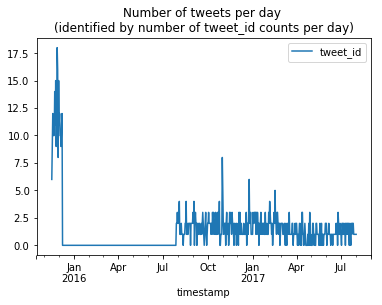

In [78]:
tweets_per_day.resample('D').count().plot(y = 'tweet_id', title= 'Number of tweets per day \n(identified by number of tweet_id counts per day)');

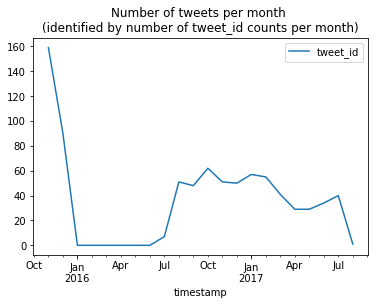

In [79]:
tweets_per_day.resample('M').count().plot(y = 'tweet_id', title= 'Number of tweets per month \n(identified by number of tweet_id counts per month)');

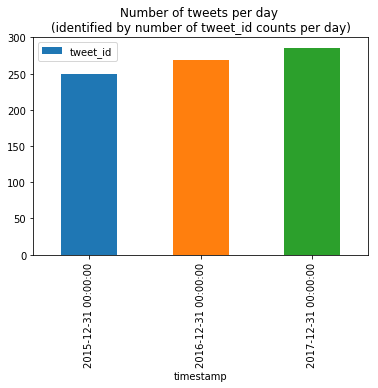

In [80]:
tweets_per_day.resample('Y').count().plot(y = 'tweet_id', kind='bar', title= 'Number of tweets per day \n(identified by number of tweet_id counts per day)');

While the plot per day seems a bit confusing, plot by month gives us a better ideia of the frequency of posting dog rates by @dog_rates. We see that for the first posts in Oct 2015 we had a very high number of tweets, compared to the rest of time, and that from Jan to May 2016 the page was unnactive, followed by more posts from July 2016 until July 2017. 

## Question 4

In [81]:
twitter_archive_master['rating_numerator'].describe()

count    804.000000
mean      11.281095
std        2.974879
min        2.000000
25%       10.000000
50%       12.000000
75%       12.000000
max       75.000000
Name: rating_numerator, dtype: float64

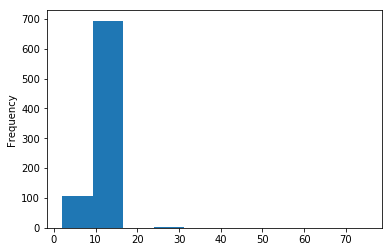

In [86]:
twitter_archive_master['rating_numerator'].plot(kind='hist')

By looking at the numbers above, we see that the average rating is actually not high, but close to 10 (which is the rating denominator for all dog rates). 80% of the ratings are above 10 and the standard deviation is small, even with very high values as 75.

### Para concluir, vamos gravar o dataframe `twitter_archive_master` em um csv no repositório local:

In [90]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

Fazendo uma rápida verificação para ver se o dataframe foi salvo corretamente:

In [91]:
pd.read_csv('twitter_archive_master.csv').head()

,tweet_id,timestamp,rating_numerator,text,name,jpg_url,favorite_count,retweet_count,dog_class,dog_races
0,892177421306343426,2017-08-01 00:17:27,13,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32753.0,6179.0,none,chihuahua
1,891815181378084864,2017-07-31 00:18:03,12,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,24667.0,4089.0,none,chihuahua
2,891689557279858688,2017-07-30 15:58:51,13,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,41529.0,8503.0,none,paper_towel
3,891327558926688256,2017-07-29 16:00:24,12,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,39720.0,9209.0,none,english_springer
4,890971913173991426,2017-07-28 16:27:12,13,Meet Jax. He enjoys ice cream so much he gets ...,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,11668.0,2030.0,none,appenzeller
